In [100]:
import cv2
import math
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

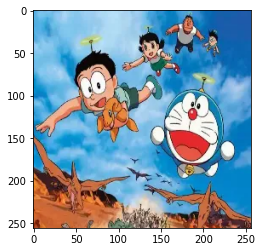

In [52]:
image_path = '../Pictures/doraemon.webp'
image = cv2.imread(image_path)
h = np.array(image)
blue, green, red = cv2.split(h)
rgb_img = cv2.merge([red, green, blue])
plt.imshow(rgb_img)
x, y, z = np.shape(image)

In [53]:
def get_combined_transformation(x, y, theta, v1, v2, l, b, t):
    x1 = x * math.cos(theta) - y * math.sin(theta) + v1 * t
    y1 = x * math.sin(theta) + y * math.cos(theta) + v2 * t
    return int(x1) % l, int(y1) % b

In [54]:
theta = random.randint(-180, 180)
v1 = random.randint(1, 100)
v2 = random.randint(1, 100)
t = time.time()
freq = random.randint(10, 20)

In [55]:
for k in range(freq):
    for i in range(x):
        for j in range(y):
            new_x, new_y = get_combined_transformation(i, j, theta, v1, v2, x, y, t)
            red[i][j] = red[new_x][new_y] ^ red[i][j]
            blue[i][j] = blue[new_x][new_y] ^ blue[i][j]
            green[i][j] = green[new_x][new_y] ^ green[i][j]

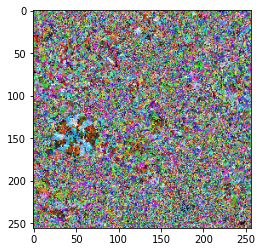

In [56]:
rgb_img = cv2.merge([red, green, blue])
plt.imshow(rgb_img)

In [57]:
# for k in range(freq):
#     for i in range(x - 1, -1, -1):
#         for j in range(y - 1, -1, -1):
#             new_x, new_y = get_combined_transformation(i, j, theta, v1, v2, x, y, t)
#             red[i][j] = red[new_x][new_y] ^ red[i][j]
#             blue[i][j] = blue[new_x][new_y] ^ blue[i][j]
#             green[i][j] = green[new_x][new_y] ^ green[i][j]

In [58]:
# rgb_img = cv2.merge([red, green, blue])
# plt.imshow(rgb_img)

In [59]:
def get_2D_logistic_adjusted_sine_map(x, y, u, limit):
    def get_next_x(x, y, u):
        return math.sin(math.pi * u * (y + 3) * x * (1 - x))
    def get_next_y(x, y, u):
        return math.sin(math.pi * u * (x + 3) * y * (1 - x))
    result_x = []
    result_y = []
    for i in range(limit):
        x = get_next_x(x, y, u)
        y = get_next_y(x, y, u)
        result_x.append(x)
        result_y.append(y)
    return result_x, result_y

In [60]:
x_ = random.uniform(0, 100)
y_ = random.uniform(0, 100)
u_ = random.uniform(0, 100)
limit = 256

In [61]:
result_x, result_y = get_2D_logistic_adjusted_sine_map(x_, y_, u_, limit)

### IEEE - 754 double precision convertor

1. Convert given number in binary
2. Represent converted binary number into scientific notation
3. Convert number into IEEE -754 dobule precision 64bit format

1st bit - sign (+ve = 0, -ve = 1)     
Next 11 bits - exponent bias + power  (2<sup>(k - 1)</sup> - 1) + p      
Next 52 bits - mantissa    

In [62]:
def get_exponent_in_scientific_notation(binary_number: str) -> int:
    return len([each for each in binary_number]) - 1

In [63]:
def get_exponent_bias_plus_power(binary_number: str) -> str:
    exponent_bias = 11
    power = get_exponent_in_scientific_notation(binary_number)
    return bin(((2 ** (k - 1)) - 1) + power)[2:]

In [64]:
def convert_binary_number_to_required_bits(binary_number: str, required_bits: int) -> str:
    if len(binary_number) > required_bits:
        return binary_number[:required_bits]
    return '0' * (required_bits - len(binary_number)) + binary_number

In [65]:
def IEEE_754_double_precision_convertor(decimal_point_number: float) -> str:
    sign = '0'
    if decimal_point_number < 0:
        sign = '1'
        decimal_point_number *= -1
    number_before_decimal = int(decimal_point_number)
    number_after_decimal = 0
    if '.' in str(decimal_point_number):
        number_after_decimal = int(str(decimal_point_number).split('.')[1])
    binary_number_before_decimal = bin(number_before_decimal)[2:]
    binary_number_after_decimal = bin(number_after_decimal)[2:]
    exponent = get_exponent_bias_plus_power(binary_number_before_decimal)
    mantissa = binary_number_before_decimal[1:] + binary_number_after_decimal
    return sign + convert_binary_number_to_required_bits(exponent, 11) + convert_binary_number_to_required_bits(mantissa, 52)

<strong>The floating point output sequences, x and y,
resulting from the 2D Sine Logistic Map are then
converted to 64–bit by utilizing the IEEE–754 double precision conversion. The control parameter a
is converted to 64–bit in the same manner. Nevertheless, it is shortened, such that only the first
44 bits are employed.</strong>

In [66]:
result_x = [int(IEEE_754_double_precision_convertor(each), 2) for each in result_x]
result_y = [int(IEEE_754_double_precision_convertor(each), 2) for each in result_y]

In [67]:
control_a = int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(u_), 44), 2)

<strong>Two sequences, L1 and L2, are generated through
the use of the linear congruential generator. These employ the parameters, 
respectively:     
    L1<sub>0</sub> = 3, 538, 644, 446, aL<sub>1</sub> = 27, c = 0, m = 2<sup>52</sup> − 1 and    
    L2<sub>0</sub> = 2, 700, 000, aL<sub>2</sub> = 37, c = 1, m = 2<sup>32</sup> −1.    
    The generated integer sequences L<sub>1</sub> and L<sub>2</sub> are
converted to 52 and 32 bits, respectively.</strong>

In [68]:
def linear_congruential_generator(x, a, c, m, limit):
    def get_next_element(x, a, c, m):
        return (a * x - 1 + c) % m
    result = []
    for i in range(limit):
        result.append(x)
        x = get_next_element(x, a, c, m)
    return result

In [69]:
limit = 256
l10 = 358644446
al1 = 27
c = 0
m = (2 ** 52) - 1
result1 = linear_congruential_generator(l10, al1, c, m, limit)
l20 = 2700000
al2 = 37
c = 1
m = (2 ** 32) - 1
result2 = linear_congruential_generator(l20, al2, c, m, limit)

In [70]:
result1 = [int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 52), 2) for each in result1]
result2 = [int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 32), 2) for each in result2]

In [71]:
key1 = []
for i in range(256):
    key = []
    for j in range(256):
        key.append((result_x[i] + result_y[j] + control_a + result1[i] + result2[j]) % 256)
    key1.append(key)

In [72]:
for i in range(x):
    for j in range(y):
        red[i][j] = red[i][j] ^ key1[i][j]
        blue[i][j] = blue[i][j] ^ key1[i][j]
        green[i][j] = green[i][j] ^ key1[i][j]

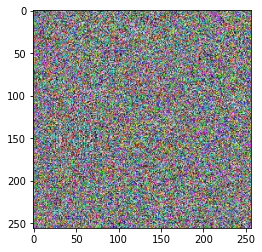

In [73]:
rgb_img = cv2.merge([red, green, blue])
plt.imshow(rgb_img)

In [74]:
def get_tent_map(x, c, limit):
    def get_next_element(x, c):
        if 0 <= x <= 0.5:
            return c * x
        if 0.5 <= x <= 1:
            return c * (1 - x)
        return x
    result = []
    for i in range(limit):
        result.append(x)
        x = get_next_element(x, c)
    return result

In [75]:
def get_bernoulli_map(x, a, b, limit):
    def get_next_element(x, a, b):
        if -a <= x <= 0:
            return (b * x) - a
        elif 0 <= x <= a:
            return (b * x) + a
        return 0
    result = []
    for i in range(limit):
        result.append(x)
        x = get_next_element(x, a, b)
    return result

In [77]:
limit = 256
r_1 = get_bernoulli_map((0.25 * 1.75) - 0.5, 0.5, 1.75, limit)
r_2 = get_tent_map(0.5, 1.5, limit)

In [80]:
r_1 = [int(IEEE_754_double_precision_convertor(each), 2) for each in r_1]
r_2 = [int(IEEE_754_double_precision_convertor(each), 2) for each in r_2]

In [83]:
key2 = []
for i in range(256):
    key = []
    for j in range(256):
        key.append((r_1[i] + r_2[i]) % 256)
    key2.append(key)

In [84]:
for i in range(x):
    for j in range(y):
        red[i][j] = red[i][j] ^ key2[i][j]
        blue[i][j] = blue[i][j] ^ key2[i][j]
        green[i][j] = green[i][j] ^ key2[i][j]

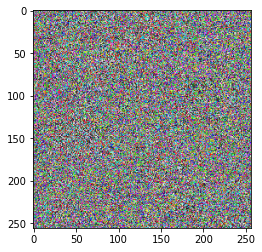

In [133]:
rgb_img = cv2.merge([red, green, blue])
plt.imshow(rgb_img)

In [124]:
_bins = 256
hist, _ = np.histogram(red.ravel(), bins=_bins, range=(0, _bins))
prob_dist = hist / hist.sum()
red_entropy = entropy(prob_dist, base=2)

In [125]:
_bins = 256
hist, _ = np.histogram(blue.ravel(), bins=_bins, range=(0, _bins))
prob_dist = hist / hist.sum()
blue_entropy = entropy(prob_dist, base=2)

In [126]:
_bins = 256
hist, _ = np.histogram(green.ravel(), bins=_bins, range=(0, _bins))
prob_dist = hist / hist.sum()
green_entropy = entropy(prob_dist, base=2)

In [128]:
_bins = 256
hist, _ = np.histogram(rgb_img.ravel(), bins=_bins, range=(0, _bins))
prob_dist = hist / hist.sum()
image_entropy = entropy(prob_dist, base=2)

In [129]:
print(red_entropy, blue_entropy, green_entropy, image_entropy)

7.997470599973883 7.997395961610535 7.9968096158061694 7.999066628722054


In [131]:
image_path = '../Pictures/doraemon.webp'
image = cv2.imread(image_path)
h = np.array(image)
b, g, r = cv2.split(h)
img = cv2.merge([r, g, b])

In [134]:
err = np.sum((rgb_img.astype("float") - img.astype("float")) ** 2)
err /= float(rgb_img.shape[0] * img.shape[1])

In [140]:
print(err)

32511.180068969727


In [141]:
psnr = cv2.PSNR(rgb_img, img)